In [1]:
import pickle
import pandas as pd 
import numpy as np 
# Shared folder to read data
SHARED_FOLDER = './yelp'

# Your folder to write new data and create notebooks.
MY_FOLDER = './output'

In [2]:
business_df=pd.read_csv('{}/business_df.csv'.format(SHARED_FOLDER))
business_df

,Unnamed: 0,attributes,business_id,categories,city,hours,latitude,longitude,open,review_count,...,hours.Thursday.close,hours.Thursday.open,hours.Tuesday.close,hours.Tuesday.open,hours.Wednesday.close,hours.Wednesday.open,avg_review_stars,reviews_count,tip_count,checkin_count
0,0,"{'Ambience': {'intimate': False, 'romantic': F...",4gRF6fR91xqaur88C3_DWw,"['Pizza', 'Restaurants', 1]",Tempe,{},33.422218,-111.925847,False,23,...,25,25,25,25,25,25,2.391304,23,3,10
1,1,"{'Dogs Allowed': True, 'Ambience': {'intimate'...",QQ0VZ1ggQO1aVf_GK6kn5g,"['Vegetarian', 'Diners', 'Vegan', 'Restaurants...",Phoenix,"{'Monday': {'close': '16:00', 'open': '07:00'}...",33.457226,-112.089834,False,216,...,16,7,16,7,16,7,4.216080,199,45,620
2,2,"{'Wheelchair Accessible': True, 'Attire': 'cas...",iung9K8cFAPLdA9k2DUoxA,"['Barbeque', 'Restaurants', 1]",Phoenix,{},33.678615,-111.974607,False,31,...,25,25,25,25,25,25,2.300000,30,7,22
3,3,"{'Alcohol': 'none', 'Outdoor Seating': True, '...",QBoynogVWpl44LglOEIYhw,"['Tex-Mex', 'Restaurants', 1]",Tempe,{},33.414355,-111.926294,True,46,...,25,25,25,25,25,25,3.500000,46,9,150
4,4,"{'Alcohol': 'none', 'Outdoor Seating': True, '...",36iFlBCnKNOyWFFXDjF0Hg,"['Fast Food', 'Mexican', 'Tex-Mex', 'Restauran...",Mesa,"{'Monday': {'close': '22:00', 'open': '10:30'}...",33.379200,-111.785500,True,5,...,22,10,22,10,22,10,2.600000,5,7,55
5,5,"{'Parking': {'lot': True, 'garage': False, 'va...",LTk9XA-htXS-ngVfnnQPUA,"['Food', 'Automotive', 'Convenience Stores', '...",Phoenix,"{'Monday': {'close': '00:00', 'open': '00:00'}...",33.479867,-112.117920,True,6,...,0,0,0,0,0,0,4.200000,5,2,124
6,6,"{'Noise Level': 'average', 'Wheelchair Accessi...",D0tHnskAgaRjCBdoXVev_g,"['Fast Food', 'Restaurants', 1]",Tempe,{},33.407353,-111.945569,True,29,...,25,25,25,25,25,25,3.666667,27,15,178
7,7,"{'Wheelchair Accessible': True, 'Attire': 'cas...",Kqn4J9NTgZdMAnV4HuYh5A,"['Food', 'Coffee & Tea', 1]",Phoenix,{},33.675854,-111.966734,False,62,...,25,25,25,25,25,25,4.338710,62,15,171
8,8,"{'Parking': {'lot': True, 'garage': False, 'va...",omHC9VhPZIQiAXWnZEe8eA,"['Shopping', 'Drugstores', 'Beauty & Spas', 'F...",Gilbert,"{'Monday': {'close': '00:00', 'open': '00:00'}...",33.267073,-111.686889,True,10,...,0,0,0,0,0,0,2.875000,8,3,35
9,9,"{'Good for Kids': True, 'Good For': {'breakfas...",cjUmPLRT43wN9Z87A9BOpg,"['Bars', 'American (Traditional)', 'Nightlife'...",Phoenix,"{'Monday': {'close': '01:00', 'open': '11:00'}...",33.509568,-112.073327,True,85,...,2,11,1,11,1,11,2.756410,78,30,357


In [3]:
del business_df['attributes.AgesAllowed']
del business_df['avg_review_stars']

In [4]:
import xgboost as xgb
import operator

In [5]:
#train=business_review_tip_checkin_df.columns[5]
features = list(business_df.columns[6:116])
X = business_df[features]
del X['stars']
#del X['reviews_count']
#del X['avg_review_stars']
X

,latitude,longitude,open,review_count,categories_Fastfood,categories_Sandwiches,categories_Pizza,categories_Vegetarian,categories_Barbeque,categories_Tex-Mex,...,hours.Sunday.open,hours.Thursday.close,hours.Thursday.open,hours.Tuesday.close,hours.Tuesday.open,hours.Wednesday.close,hours.Wednesday.open,reviews_count,tip_count,checkin_count
0,33.422218,-111.925847,False,23,0,0,1,0,0,0,...,25,25,25,25,25,25,25,23,3,10
1,33.457226,-112.089834,False,216,0,0,0,1,0,0,...,7,16,7,16,7,16,7,199,45,620
2,33.678615,-111.974607,False,31,0,0,0,0,1,0,...,25,25,25,25,25,25,25,30,7,22
3,33.414355,-111.926294,True,46,0,0,0,0,0,1,...,25,25,25,25,25,25,25,46,9,150
4,33.379200,-111.785500,True,5,1,0,0,0,0,1,...,10,22,10,22,10,22,10,5,7,55
5,33.479867,-112.117920,True,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,2,124
6,33.407353,-111.945569,True,29,1,0,0,0,0,0,...,25,25,25,25,25,25,25,27,15,178
7,33.675854,-111.966734,False,62,0,0,0,0,0,0,...,25,25,25,25,25,25,25,62,15,171
8,33.267073,-111.686889,True,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8,3,35
9,33.509568,-112.073327,True,85,0,0,0,0,0,0,...,11,2,11,1,11,1,11,78,30,357


In [6]:
def label_df(x):
    if x<=2:x=0
    elif (x>2 and x<=3):x=1
    else:x=2
    return(x)

In [7]:
y =business_df['stars'].apply(label_df)
y

0       1
1       2
2       1
3       2
4       1
5       2
6       2
7       2
8       1
9       1
10      1
11      2
12      2
13      1
14      1
15      2
16      2
17      2
18      1
19      2
20      1
21      1
22      2
23      2
24      2
25      2
26      0
27      2
28      2
29      2
       ..
1227    1
1228    2
1229    2
1230    2
1231    2
1232    2
1233    0
1234    1
1235    1
1236    2
1237    2
1238    0
1239    2
1240    1
1241    1
1242    1
1243    2
1244    1
1245    1
1246    2
1247    2
1248    1
1249    2
1250    2
1251    2
1252    2
1253    1
1254    2
1255    0
1256    1
Name: stars, dtype: int64

In [8]:
def do_metrics(y_test,y_pred):
    print ("metrics.confusion_matrix:")
    print (metrics.confusion_matrix(y_test, y_pred))
    print ("metrics.accuracy_score:")
    print (metrics.accuracy_score(y_test, y_pred))
    print ("metrics.precision_score:")
    print (metrics.precision_score(y_test, y_pred))
    print ("metrics.recall_score:")
    print (metrics.recall_score(y_test, y_pred))
    print ("metrics.f1_score:")
    print (metrics.f1_score(y_test,y_pred))

In [10]:
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=0)
params = {
   'booster': 'gbtree',
    'objective': 'multi:softmax',
    'num_class': 3,
    'gamma': 0.1,
    'max_depth': 6,
    'lambda': 2,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'min_child_weight': 3,
    'silent': 1,
    'eta': 0.01,
    'seed': 1000
}

plst = params.items()
dtrain = xgb.DMatrix(X_train, y_train)
num_rounds = 500
model = xgb.train(plst, dtrain, num_rounds)

dtest = xgb.DMatrix(X_test)
ans = model.predict(dtest)
do_metrics(y_test, ans)

metrics.confusion_matrix:
[[  3   8  10]
 [  0  42  71]
 [  1  28 215]]
metrics.accuracy_score:
0.687830687831
metrics.precision_score:
0.671497046497
metrics.recall_score:
0.687830687831
metrics.f1_score:
0.658816485119


C:\Users\18791\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1203: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
C:\Users\18791\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1304: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weig

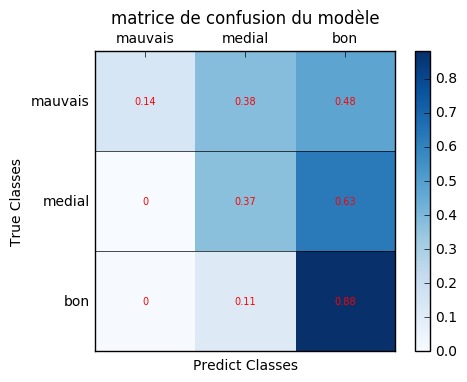

In [13]:
labels=['mauvais','medial','bon']
def plot_confusion_matrix(y_true, y_pred, labels):
    import matplotlib.pyplot as plt
    from sklearn.metrics import confusion_matrix
    #cmap = plt.cm.binary
    cmap='Blues'
    cm = confusion_matrix(y_true, y_pred)
    tick_marks = np.array(range(len(labels))) + 0.5
    np.set_printoptions(precision=2)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(5, 4), dpi=120)
    ind_array = np.arange(len(labels))
    x, y = np.meshgrid(ind_array, ind_array)
    intFlag = 0 
    for x_val, y_val in zip(x.flatten(), y.flatten()):
        if (intFlag):
            c = cm[y_val][x_val]
            plt.text(x_val, y_val, "%d" % (c,), color='red', fontsize=8, va='center', ha='center')

        else:
            c = cm_normalized[y_val][x_val]
            if (c > 0.01):
                #add numbers
                plt.text(x_val, y_val, "%0.2f" % (c,), color='red', fontsize=7, va='center', ha='center')
            else:
                plt.text(x_val, y_val, "%d" % (0,), color='red', fontsize=7, va='center', ha='center')
    if(intFlag):
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
    else:
        plt.imshow(cm_normalized, interpolation='nearest', cmap=cmap)

    plt.gca().set_xticks(tick_marks, minor=False)
    plt.gca().set_yticks(tick_marks, minor=True)
    plt.gca().xaxis.set_ticks_position('none')
    plt.gca().yaxis.set_ticks_position('none')
    plt.gca().xaxis.tick_top()
    plt.grid(True, which='minor', linestyle='-')
    plt.gcf().subplots_adjust(bottom=0.15)
    plt.colorbar()
    xlocations = np.array(range(len(labels)))
    plt.xticks(xlocations, labels)
    plt.yticks(xlocations, labels)
    plt.title('matrice de confusion du modèle\n')
    plt.ylabel('True Classes')
    plt.xlabel('Predict Classes')
    plt.savefig('confusion_matrix.jpg', dpi=300)
    plt.show()
plot_confusion_matrix(y_test, ans,labels)